In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
#counting unique values in dataframe
count = df.nunique()
count

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [20]:
#C IN INVOICE NUMBER INDEICATE CANCELLED TRASACTIONS WE WILL NOT CONSIDER THEM
# we can find all invoices with ‘C’ in them, and take the inverse of the results.
df = df[~df["InvoiceNo"].str.contains("C", na = False)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


In [13]:
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [18]:
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df

<ipython-input-18-acd1522b67c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [21]:
#Most recent Purchase
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [57]:

import datetime as dt
#Subracting each customer last purchase time with the last purchase time overall among all the customers
Recency = (dt.datetime(2011, 12, 9) - df.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
Recency

,Recency
CustomerID,
12346.0,324 days 13:59:00
12347.0,1 days 08:08:00
12348.0,74 days 10:47:00
12349.0,17 days 14:09:00
12350.0,309 days 07:59:00
...,...
18280.0,276 days 14:08:00
18281.0,179 days 13:07:00
18282.0,6 days 12:17:00


In [36]:
#Counting total times a customer has visited
#the number of unique invoices of  customer is Frequency
#Using unique invoicedate to get unique invoices
Frequency = df.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
Frequency

,Frequency
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


In [37]:
#Calculating total revenue by each customer for the business
Monetary = df.groupby("CustomerID").agg({"TotalAmount":"sum"}).rename(columns={"TotalAmount":"Monetary"})
Monetary

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [39]:
#concatenating three columns we created above column wise
rfm = pd.concat([Recency, Frequency, Monetary],  axis=1)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,324 days 13:59:00,1,77183.60
12347.0,1 days 08:08:00,7,4310.00
12348.0,74 days 10:47:00,4,1797.24
12349.0,17 days 14:09:00,1,1757.55
12350.0,309 days 07:59:00,1,334.40
...,...,...,...
18280.0,276 days 14:08:00,1,180.60
18281.0,179 days 13:07:00,1,80.82
18282.0,6 days 12:17:00,2,178.05


In [51]:
#qcut is to divide in quantiles qcut(x,q,labels) q is no. of quantiles and no of labels must be same as q
#(.rankmethod = first) to deal with similar values  in frequency column as we donot have unique values in frequency
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore
CustomerID,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1
12347.0,1 days 08:08:00,7,4310.00,5,5
12348.0,74 days 10:47:00,4,1797.24,4,2
12349.0,17 days 14:09:00,1,1757.55,1,4
12350.0,309 days 07:59:00,1,334.40,1,1
...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1
18281.0,179 days 13:07:00,1,80.82,2,1
18282.0,6 days 12:17:00,2,178.05,3,5


In [49]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore
CustomerID,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1
12347.0,1 days 08:08:00,7,4310.00,5,5
12348.0,74 days 10:47:00,4,1797.24,4,2
12349.0,17 days 14:09:00,1,1757.55,1,4
12350.0,309 days 07:59:00,1,334.40,1,1
...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1
18281.0,179 days 13:07:00,1,80.82,2,1
18282.0,6 days 12:17:00,2,178.05,3,5


In [59]:
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])
rfm


,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1,5
12347.0,1 days 08:08:00,7,4310.00,5,5,5
12348.0,74 days 10:47:00,4,1797.24,4,2,4
12349.0,17 days 14:09:00,1,1757.55,1,4,4
12350.0,309 days 07:59:00,1,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1,1
18281.0,179 days 13:07:00,1,80.82,2,1,1
18282.0,6 days 12:17:00,2,178.05,3,5,1


In [65]:
#converting datatypes for concatenation
#calculating rfm score
#Recency weightage out of 100
#Frequency weightage out of 10
#Monetary weightage out of 1
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                     rfm['FrequencyScore'].astype(str) + 
                     rfm['MonetaryScore'].astype(str))
rfm

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1,5,115
12347.0,1 days 08:08:00,7,4310.00,5,5,5,555
12348.0,74 days 10:47:00,4,1797.24,4,2,4,244
12349.0,17 days 14:09:00,1,1757.55,1,4,4,414
12350.0,309 days 07:59:00,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1,1,121
18281.0,179 days 13:07:00,1,80.82,2,1,1,121
18282.0,6 days 12:17:00,2,178.05,3,5,1,531


In [70]:
# Assigning classes  according to rfm segments.
#  The Champions class has the Recency value is 5, the Frequency value is 4-5, 
#Only Recency and Frequency are added here  because only these two parameters were included in the table
#r character  stands for raw, not regex. The raw string is slightly different from a regular string,
#  uses a search pattern to find a string or set of strings
segment = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}


In [73]:
#Depending on the nature of your businesses, you might increase or decrease the relative importance of each RFM variable to arrive at the final score. For example:
#In a consumer durables business, the monetary value per transaction is normally high but frequency and recency is low. For example, you can’t expect a customer to purchase a refrigerator or air conditioner on a monthly basis. In this case, a marketer could give more weight to monetary and recency aspects rather than the frequency aspect.
#In a retail business selling fashion/cosmetics, a customer who searches and purchases products every month will have a higher recency and frequency score than monetary score. Accordingly, the RFM score could be calculated by giving more weight to R and F scores than M.

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1,5,115,11
12347.0,1 days 08:08:00,7,4310.00,5,5,5,555,55
12348.0,74 days 10:47:00,4,1797.24,4,2,4,244,24
12349.0,17 days 14:09:00,1,1757.55,1,4,4,414,41
12350.0,309 days 07:59:00,1,334.40,1,1,2,112,11
...,...,...,...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1,1,121,12
18281.0,179 days 13:07:00,1,80.82,2,1,1,121,12
18282.0,6 days 12:17:00,2,178.05,3,5,1,531,53


In [83]:
rfm['Segment'] = rfm['Segment'].replace(segment, regex=True)
rfm


,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,324 days 13:59:00,1,77183.60,1,1,5,115,Hibernating
12347.0,1 days 08:08:00,7,4310.00,5,5,5,555,Champions
12348.0,74 days 10:47:00,4,1797.24,4,2,4,244,At Risk
12349.0,17 days 14:09:00,1,1757.55,1,4,4,414,Promising
12350.0,309 days 07:59:00,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...
18280.0,276 days 14:08:00,1,180.60,2,1,1,121,Hibernating
18281.0,179 days 13:07:00,1,80.82,2,1,1,121,Hibernating
18282.0,6 days 12:17:00,2,178.05,3,5,1,531,Potential Loyalists


In [85]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Recency         4339 non-null   timedelta64[ns]
 1   Frequency       4339 non-null   int64          
 2   Monetary        4339 non-null   float64        
 3   FrequencyScore  4339 non-null   category       
 4   RecencyScore    4339 non-null   category       
 5   MonetaryScore   4339 non-null   category       
 6   RFM_SCORE       4339 non-null   object         
 7   Segment         4339 non-null   object         
dtypes: category(3), float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 216.7+ KB


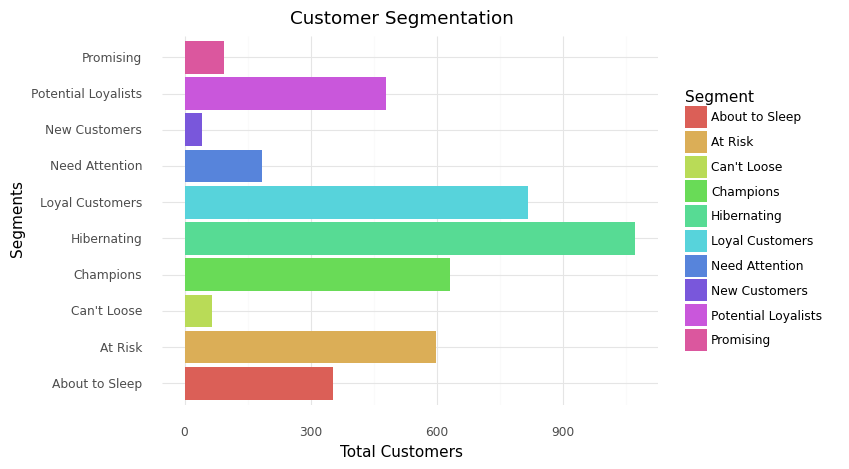

<ggplot: (8777273072363)>

In [91]:
from plotnine import ggplot, aes, geom_bar ,labs,coord_flip,theme_minimal

ggplot(data = rfm) + aes(x ='Segment',fill='Segment')+ geom_bar() + labs(title = "Customer Segmentation", x = "Segments", y = "Total Customers") + coord_flip()+ theme_minimal()
